In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import utils

num_classes = 150
batch_size = 4

graph = tf.Graph()
dataset = utils.load_dataset('/Users/reed/Documents/ADEChallengeData2016/images/validation/', 
                             graph,
                             '/Users/reed/Documents/ADEChallengeData2016/annotations/validation/')
with graph.as_default():
    batched_dataset = dataset[0].batch(batch_size)
    iterator = batched_dataset.make_initializable_iterator()
    next_element = iterator.get_next()

    init = (iterator.make_initializer(batched_dataset))

with tf.Session(graph=graph) as sess:
    sess.run(init)
    try:
        batch = tf.data.Dataset.from_tensor_slices(sess.run(next_element))
        images, labels = utils.stack_batch_into_tensor(batch, graph, train=True)
        one_hot_labels = tf.squeeze(tf.one_hot(tf.cast(labels, tf.uint8), num_classes+1))
        labels = sess.run(tf.squeeze(labels))
        images = sess.run(images)
        one_hot_labels = sess.run(one_hot_labels)
    except tf.errors.OutOfRangeError:
        pass



In [14]:
print(images.shape)

(4, 224, 224, 3)


In [15]:
print(labels.shape)

(4, 224, 224)


In [16]:
print(one_hot_labels.shape)

(4, 224, 224, 151)


In [17]:
print(one_hot_labels[0,0,21])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


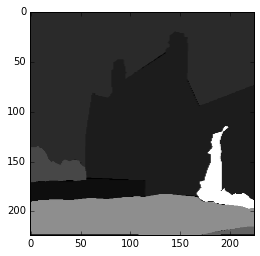

[[ 3.  3.  3. ...  0.  0.  0.]
 [ 3.  3.  3. ...  3.  3.  3.]
 [ 3.  3.  3. ...  3.  3.  3.]
 ...
 [10. 10. 10. ...  7.  7.  7.]
 [10. 10. 10. ...  7.  7.  7.]
 [ 3.  3.  3. ...  2.  2.  2.]]
(4, 224, 224)
Max: 18.0 Min: 0.0


In [18]:

# Note
# plt.imshow() with a cmap of gray seems to scale the image values to the full 
# range of 0-255. This makes the labels appear lighter nad have different values, 
# although in the numpy array they are correct
plt.imshow(labels[0], cmap='gray')
plt.show()
print(np.around(labels[0]))
print(labels.shape)
print('Max:', labels[0].max(), 'Min:', labels[0].min())

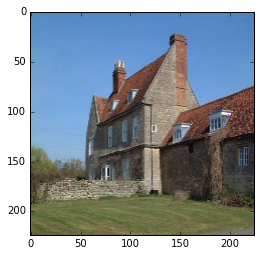

In [19]:
images = images.astype(int)
images = -1*images + 255 # it's negative for some reason
plt.imshow(images[0])
plt.show()

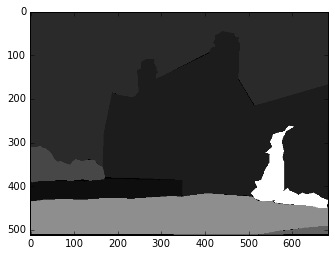

[[ 3.  3.  3. ...  0.  0.  0.]
 [ 3.  3.  3. ...  0.  0.  0.]
 [ 3.  3.  3. ...  3.  3.  0.]
 ...
 [10. 10. 10. ...  7.  7.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [8]:
image = plt.imread('/Users/reed/Documents/ADEChallengeData2016/annotations/validation/ADE_val_00000001.png')
image = image * 255
plt.imshow(image, cmap='gray')
plt.show()
print(image)